### Nonlinear Dimensionality Reduction LLE MLLE ISO

Jay Urbain, PhD

#### Objectives:    
-Students can explain commonly used nonlinear manifold learning techniques: kernel PCA, Isomap, LLE, and variants of LLE (e.g. MLLE)

-Students can explain the differences between these techniques

-Students can connect kernel PCA to classical (linear) PCA and understand how the former is a generalization of the latter

-Students can apply these techniques to a dataset

#### References

1. Ali Ghodsi, Dimensionality Reduction, A Short Tutorial, 2006.   
https://www.math.uwaterloo.ca/~aghodsib/courses/f06stat890/readings/tutorial_stat890.pdf

2. A global geometric framework for nonlinear dimensionality reduction, Tenenbaum, J.B.; De Silva, V.; & Langford, J.C. Science 290 (5500)   
http://science.sciencemag.org/content/290/5500/2319.full

3. S. T. Roweis and L. K. Saul. Nonlinear dimensionality reduction by locally linear embedding. Science, 290(5500):2323–2326, 2000.

4. Manifold Learning, Scikit-Learn    
https://scikit-learn.org/stable/modules/manifold.html

5. Ben Alex Keen, Isomap for Dimensionality Reduction in Python    
http://benalexkeen.com/isomap-for-dimensionality-reduction-in-python/

6. Partial eigenvalue decomposition for large image sets using run-length encoding   
https://www.sciencedirect.com/science/article/abs/pii/003132039400113Z

7. Comparison of Manifold Learning methods   
https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

8. Comparison of Manifold Learning methods   
https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

9. Manifold learning on handwritten digits: Locally Linear Embedding, Isomap…      
https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

10. Zhang and Wang, MLLE: Modified Locally Linear Embedding UsingMultiple Weights    
https://pdfs.semanticscholar.org/0af7/50dce2aa1d1f41a0709075eff88f900a4ae3.pdf

11. Jake VanderPlas, Python Data Science Handbook  
https://jakevdp.github.io/PythonDataScienceHandbook/



### Assignment 1: Manifold Learning PCA LLE on Wine Dataset
    
Data Set Information: Kaggle Red Wine Dataset. 1599 examples with 12 features on wine quality. Predict wine quality (0-10)

https://www.kaggle.com/piyushgoyal443/red-wine-dataset#wineQualityInfo.txt

Using the notebook (DimensionalityReduction_53_2_nonlinear_lle_mlle_iso):

1) Load the the wine quality data set.

2) Fit PCA to 12-components (max) and plot the cumulative sum of the ‘pca.explained_variance_ratio_’

3) Identify the number of principal components to explain 90% of the variance.

4) Build a logistic regression model and record the accuracy.

5) Repeat steps 2 and 4 using LLE with the same number of components and 30 neighbors.

6) Record your observations and identify your top performing model. Does manifold learning improve predictive performance over PCA?


#### Red Wine Dataset

Citation Request: This dataset is public available for research. The details are described in [Cortez et al., 2009]. Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016 

Description of attributes:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data): 12 - quality (score between 0 and 10)

https://www.kaggle.com/piyushgoyal443/red-wine-dataset#wineQualityInfo.txt

In [0]:
!ls data/red-wine-dataset

ls: cannot access 'data/red-wine-dataset': No such file or directory


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/wineQualityReds.csv')
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
df.shape

(1599, 13)

In [0]:
#Checking if there is any existing null value or not
df.isnull().sum()

Unnamed: 0              0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [0]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [0]:
#Checking the unique values from "quality column"
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [0]:
#Count the unique values in "quality column"
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

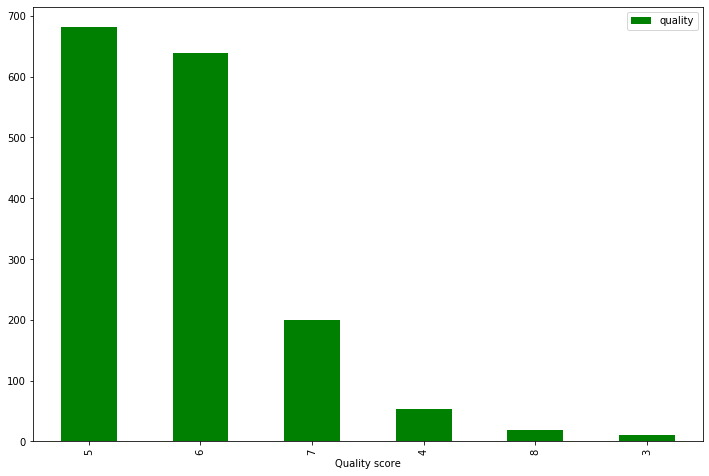

In [0]:
#Plot for quality
plt.figure(figsize=(12,8))
df["quality"].value_counts().plot.bar(color='green')
plt.xlabel("Quality score")
plt.legend()

In [0]:
#Checking the dimensions
df.shape

(1599, 12)

In [0]:
#Separating dependent and independent variable.
X = df.iloc[:, :12].values
y = df.iloc[:, -1].values

In [0]:
print(X)

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


In [0]:
print(y)

[5 5 5 ... 6 5 6]


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We would like to plot a low-dimensional embedding of the 4096-dimensional data to learn the fundamental relationships between the images. 

One useful way to start is to compute a PCA, and examine the explained variance ratio, which will give us an idea of how many linear features are required to describe the data:

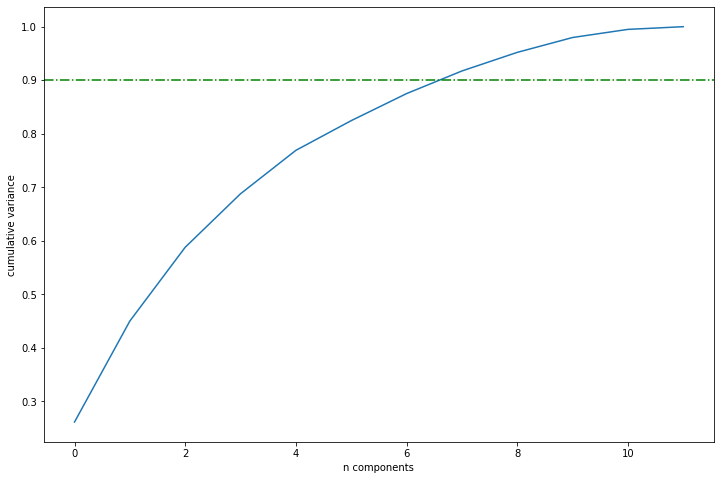

In [0]:
from sklearn.decomposition import PCA
import numpy as np
model = PCA(12).fit(X_train)
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.axhline(0.90, color='green', linestyle='-.')
plt.xlabel('n components')
plt.ylabel('cumulative variance');

Identify the `n_components` that explain 90% of the variance.

Build a PCA model and transform the data.

In [0]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X_train_pca = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [0]:
print(explained_variance)

[0.2612978  0.18869762 0.13784491 0.09996698 0.08111483 0.05551371]


In [0]:
#### Build a logistic regression model on your PCA transformed data

In [0]:
#Fitting Logistic regression into dataset
from sklearn.linear_model import LogisticRegression
lr_c=LogisticRegression(random_state=0, solver="lbfgs", multi_class="auto")
lr_c.fit(X_train_pca,y_train)
lr_pred=lr_c.predict(X_test_pca)
lr_cm=confusion_matrix(y_test,lr_pred)
print("The accuracy of LogisticRegression is:",accuracy_score(y_test, lr_pred))

The accuracy of LogisticRegression is: 0.740625


#### Fit and transform the data using `LocallyLinearEmbedding`

Use `n_neighbors` = 30  
Set `n_components` to the same value you used for PCA  
Use `method`='standard')  


In [0]:
from sklearn.manifold import LocallyLinearEmbedding


In [0]:
lle = LocallyLinearEmbedding(n_components=12, n_neighbors=30, method='standard',)
X_train_lle = lle.fit_transform(X_train)
X_test_lle = lle.transform(X_test)

lr_lle=LogisticRegression(random_state=0, solver="lbfgs", multi_class="auto")
lr_lle.fit(X_train_lle,y_train)
lr_pred=lr_lle.predict(X_test_lle)
lr_cm=confusion_matrix(y_test,lr_pred)
print("The accuracy of LogisticRegression is:",accuracy_score(y_test, lr_pred))

The accuracy of LogisticRegression is: 0.746875


In [0]:
lr_cm

array([[  1,   0,   1,   0,   0,   0],
       [  0,   2,   6,   3,   0,   0],
       [  0,   0, 112,  23,   0,   0],
       [  0,   0,  23, 104,  15,   0],
       [  0,   0,   0,   9,  18,   0],
       [  0,   0,   0,   0,   3,   0]])

Conclusion: LLE and other manifold methoods do not, in general improve predictive performance than lle!

### Assignment 2: Manifold Learning

The facial data used in Tenenbaum et al. contains images of 698 synthetic faces in different poses and light conditions.

https://github.com/JasonFil/DimReduce/blob/master/ISOMAP/face_data.mat

Using the notebook (DimensionalityReduction_53_2_nonlinear_lle_mlle_iso):

1) Load face_data.mat

2) Experiment with Isomap, LLE, MLLE, and MDS and try to find the best model for only two components!

3) Record your observations and identify your top performing model. In terms of how the algorithms work, why do you think this is your top model.

The facial data used in Tenenbaum et al. contains images of faces in different poses and light conditions.


In [0]:
from google.colab import files 

uploaded = files.upload()

Saving face_data.mat to face_data (1).mat


In [0]:
import math
import pandas as pd
import scipy.io as sio
pd.options.display.max_columns = 7

file = sio.loadmat('face_data.mat')
df = pd.DataFrame(file['images']).T

num_images, num_pixels = df.shape
pixels_per_dimension = int(math.sqrt(num_pixels))


In [0]:
df.head()

,0,1,2,...,4093,4094,4095
0,0.016176,0.016176,0.016176,...,0.0,0.0,0.0
1,0.016176,0.016176,0.016176,...,0.0,0.0,0.0
2,0.016176,0.016176,0.016176,...,0.0,0.0,0.0
3,0.016176,0.016176,0.016176,...,0.0,0.0,0.0
4,0.016176,0.016176,0.016176,...,0.0,0.0,0.0


In [0]:
# Rotate the pictures
for idx in df.index:
    df.loc[idx] = df.loc[idx].values.reshape(pixels_per_dimension, pixels_per_dimension).T.reshape(-1)
    
# Show first 5 rows
print(df.head())

       0         1         2     ...  4093  4094  4095
0  0.016176  0.000000  0.000000  ...   0.0   0.0   0.0
1  0.016176  0.000000  0.000000  ...   0.0   0.0   0.0
2  0.016176  0.000000  0.000000  ...   0.0   0.0   0.0
3  0.016176  0.110754  0.384988  ...   0.0   0.0   0.0
4  0.016176  0.000000  0.000000  ...   0.0   0.0   0.0

[5 rows x 4096 columns]


In [0]:
df.describe()

,0,1,2,...,4093,4094,4095
count,698.000000,698.000000,698.000000,...,698.0,698.0,698.0
mean,0.016755,0.005971,0.018461,...,0.0,0.0,0.0
std,0.005788,0.041508,0.087379,...,0.0,0.0,0.0
min,0.016176,0.000000,0.000000,...,0.0,0.0,0.0
25%,0.016176,0.000000,0.000000,...,0.0,0.0,0.0
50%,0.016176,0.000000,0.000000,...,0.0,0.0,0.0
75%,0.016176,0.000000,0.000000,...,0.0,0.0,0.0
max,0.125429,0.589170,0.915395,...,0.0,0.0,0.0


Fit our isomap to our data. If your data is not on the same scale, it may require scaling before this step.

Fit a manifold using $6$ nearest neighbours and our aim is to reduce down to $2$ components.

In [0]:
from sklearn import manifold

In [0]:
iso_model = manifold.Isomap(n_neighbors=6, n_components=2)
manifold_2Da = iso_model.fit_transform(df)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

# Left with 2 dimensions
manifold_2D.head()

,Component 1,Component 2
0,-26.169062,-0.578853
1,32.540561,-12.856883
2,-22.208342,6.490292
3,52.831644,-30.531746
4,-41.978740,8.017211


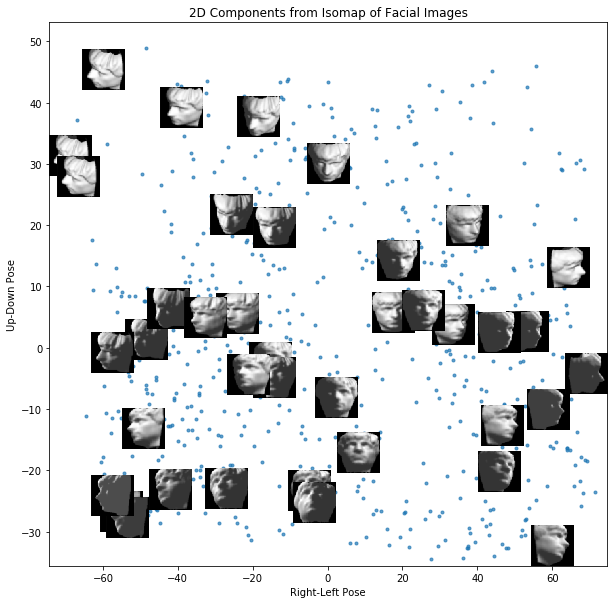

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

We have reduced the dimensions from 4096 dimensions (pixels) to just 2 dimensions.

These 2 dimensions represent the different points of view of the face, from left to right and from bottom to top.

In [0]:
lle_model = manifold.LocallyLinearEmbedding(n_neighbors=6, n_components=2)
manifold_2Da = lle_model.fit_transform(df)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

# Left with 2 dimensions
manifold_2D.head()

,Component 1,Component 2
0,0.027055,0.016013
1,-0.027260,0.006182
2,0.022746,0.028526
3,-0.062064,-0.073395
4,0.028547,0.019939


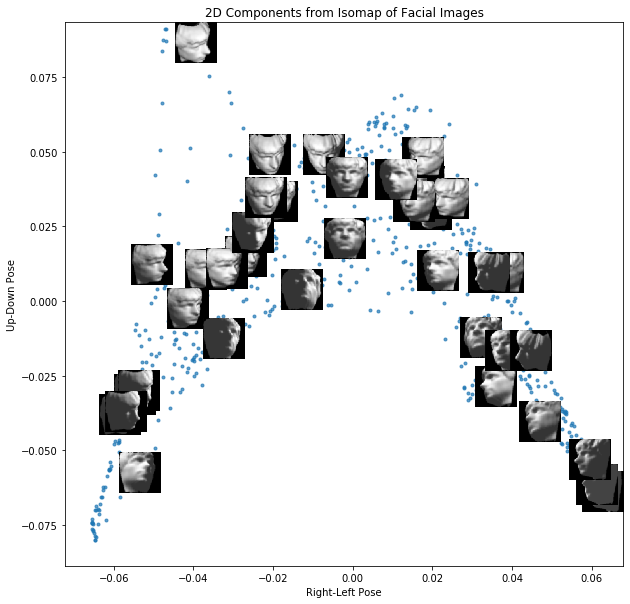

In [0]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

In [0]:
mle_model = manifold.LocallyLinearEmbedding(n_components=2, n_neighbors=6, 
                                            method='modified')
manifold_2Da = mle_model.fit_transform(df)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

# Left with 2 dimensions
manifold_2D.head()

,Component 1,Component 2
0,-0.033129,-0.000450
1,0.037488,0.006539
2,-0.027747,-0.007807
3,0.057528,0.026818
4,-0.043218,0.008347


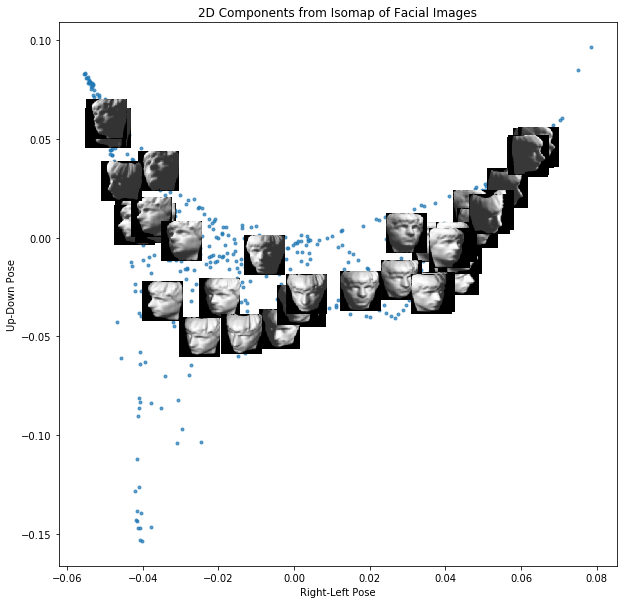

In [0]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

In [0]:
mds_model = manifold.MDS(n_components=2)
manifold_2Da = mds_model.fit_transform(df)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

# Left with 2 dimensions
manifold_2D.head()

,Component 1,Component 2
0,-6.551788,-2.224115
1,6.501497,2.410836
2,-7.253691,-4.316704
3,10.522649,-4.751306
4,-2.029090,9.560165


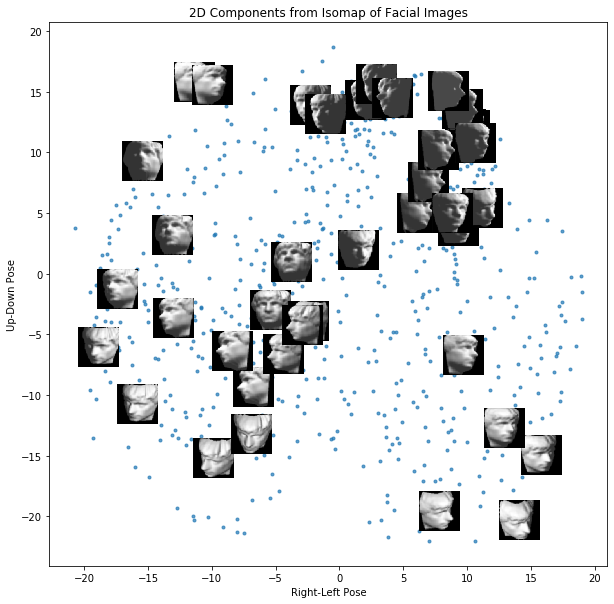

In [0]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

We concluded that Isomap is our top performing model by taking the geodesic distance between all points. 